In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import numpy as np


In [ ]:
df = pd.read_csv(r"C:\Users\vaishu\Desktop\IITH\assignments\PRML\Dataset\BTC-USD.csv")

# Extract specific columns
columns_to_extract = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']  # Replace with your column names
# Assuming 'df' has 'Close' and 'Volume' columns
df['Weighted_Price'] = df['Close'] * df['Volume']
vwap = df['Weighted_Price'].sum() / df['Volume'].sum()
print(f"Volume-Weighted Average Price (VWAP): {vwap}")

df['Date']=pd.to_datetime(df['Date']).dt.tz_localize(None)
# Resample to daily frequency
df_daily = df.resample('D', on='Date').mean()

# Resample to monthly frequency
df_monthly = df.resample('M', on='Date').mean()

# Resample to annual frequency
df_annual = df.resample('A-DEC', on='Date').mean()

# Resample to quarterly frequency
df_quarterly = df.resample('Q-DEC', on='Date').mean()

In [20]:
# Handling missing values in df_daily
df_daily = df_daily.fillna(df_daily.mean())

# Handling missing values in df_monthly
df_monthly = df_monthly.fillna(df_monthly.mean())

# Handling missing values in df_annual
df_annual = df_annual.fillna(df_annual.mean())

# Handling missing values in df_quarterly
df_quarterly = df_quarterly.fillna(df_quarterly.mean())

In [22]:
# Calculate the daily percentage change in Bitcoin price
df_daily['Price_Pct_Change'] = df_daily['Close'].pct_change()

# Calculate 3-month moving average for df_monthly
df_monthly['Moving_Average_3M'] = df_monthly['Close'].rolling(window=3).mean()

# Calculate 6-month moving average for df_monthly
df_monthly['Moving_Average_6M'] = df_monthly['Close'].rolling(window=6).mean()

# Calculate 12-month moving average for df_annual
df_annual['Moving_Average_12M'] = df_annual['Close'].rolling(window=12).mean()

# Calculate 3-month rolling standard deviation for df_quarterly
df_quarterly['Rolling_Std_3M'] = df_quarterly['Close'].rolling(window=3).std()

# Calculate 6-month rolling standard deviation for df_quarterly
df_quarterly['Rolling_Std_6M'] = df_quarterly['Close'].rolling(window=6).std()

In [23]:
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Weighted_Price
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,9.629991e+09
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,1.463605e+10
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,1.497055e+10
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,1.507367e+10
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,1.060070e+10


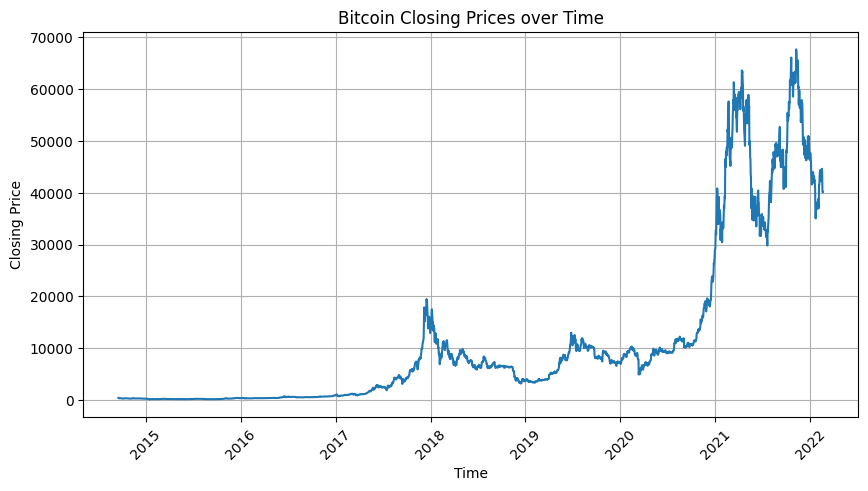

In [24]:


# Convert Unix time to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the Timestamp column as the index
df.set_index('Date', inplace=True)

# Plot 1: Line chart of Bitcoin closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'])
plt.title('Bitcoin Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [50]:
# Split data into train and test sets
train_size = int(len(df_daily) * 0.9)
train_data, test_data = df_daily[:train_size], df_daily[train_size:]
test_data.head()

,Open,High,Low,Close,Adj_Close,Volume,Weighted_Price,Price_Pct_Change
Date,,,,,,,,
2021-05-24,34700.363281,39835.140625,34551.082031,38705.980469,38705.980469,6.735958e+10,2.607219e+15,0.113182
2021-05-25,38795.781250,39776.351563,36581.429688,38402.222656,38402.222656,5.621192e+10,2.158663e+15,-0.007848
2021-05-26,38392.625000,40782.078125,37905.835938,39294.199219,39294.199219,5.134674e+10,2.017629e+15,0.023227
2021-05-27,39316.890625,40379.617188,37247.902344,38436.968750,38436.968750,4.321097e+10,1.660899e+15,-0.021816
2021-05-28,38507.082031,38856.968750,34779.039063,35697.605469,35697.605469,5.520019e+10,1.970515e+15,-0.071269


In [27]:
# Scale the data
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data[['Close']])
scaled_test_data = scaler.transform(test_data[['Close']])

In [51]:
# LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(np.expand_dims(scaled_train_data, axis=-1),
                              np.expand_dims(scaled_train_data, axis=-1),
                              epochs=10, batch_size=1, verbose=0)
lstm_predictions = lstm_model.predict(np.expand_dims(scaled_test_data, axis=-1))
lstm_predictions = scaler.inverse_transform(lstm_predictions)
print("done")

C:\Users\vaishu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
done


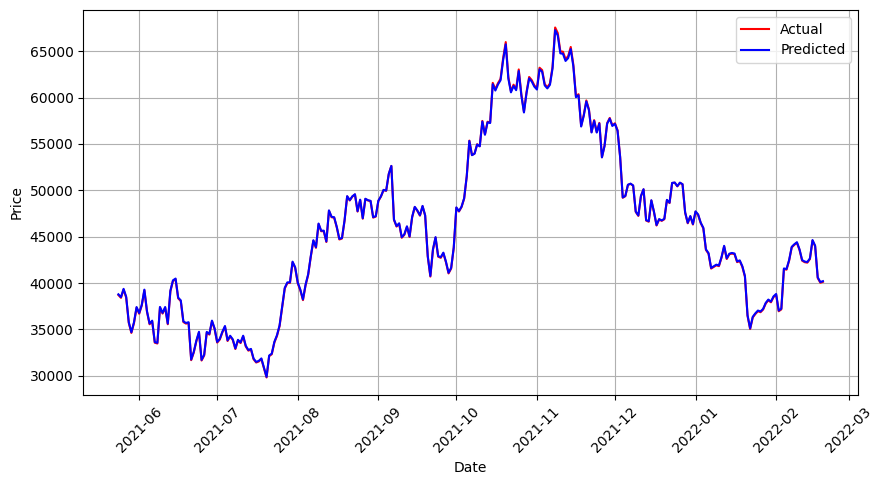

83.04495789141703


In [52]:

plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual')

plt.plot(test_data.index, lstm_predictions,color='blue', label='Predicted')

plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
lstm_rmse = np.sqrt(mean_squared_error(test_data['Close'], lstm_predictions))
print(lstm_rmse)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
test_y= scaler.inverse_transform(scaled_test_data)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data['Close'], lstm_predictions)

# Mean Squared Error (MSE)
mse = mean_squared_error(test_data['Close'], lstm_predictions)

# Root Mean Square Error (RMSE)For LSTM:
rmse = np.sqrt(mse)


# Mean Absolute Percentage Error (MAPE)
# Add a small epsilon to avoid division by zero
epsilon = 1e-10
mape = np.mean(np.abs((test_y - lstm_predictions) / (test_y))) * 100

# Symmetric Mean Absolute Percentage Error (sMAPE)
smape = np.mean(2 * np.abs(test_y - lstm_predictions) / (np.abs(test_y) + np.abs(lstm_predictions))) * 100

# Print all metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Symmetric Mean Absolute Percentage Error (sMAPE): {smape:.2f}%")


Mean Absolute Error (MAE): 71.41
Mean Squared Error (MSE): 6896.47
Root Mean Square Error (RMSE): 83.04
Mean Absolute Percentage Error (MAPE): 0.16%
Symmetric Mean Absolute Percentage Error (sMAPE): 0.16%
